<a href="https://colab.research.google.com/github/JordanBaker78/Data110-2025/blob/main/Data110_Jordan_Baker_Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')

titanic.head(15)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


#Part 1: Understanding the Dataset

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


###Task 1

This dataset contains information based on the passengers on board the Titanic. The dataset contains data from passnegers such as age, sex, thier fare and class, and whether or not they survived or not. The dataset contains 2 boolean columns, 2 category columns, 2 numeric, 4 interger columns, and 5 object columns.

#Part 2: Fare and Survival Analysis

###Task 2

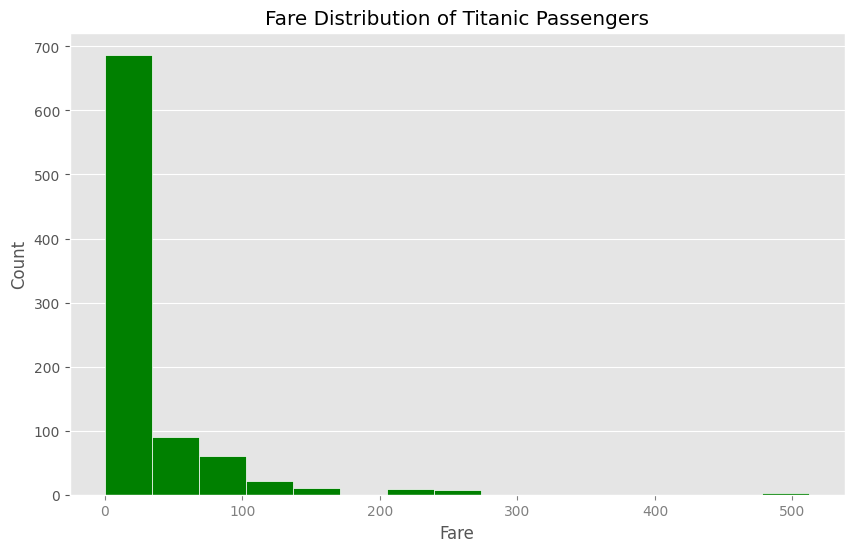

In [11]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.hist(titanic['fare'], bins=15, color='green',edgecolor='white')
plt.title('Fare Distribution of Titanic Passengers')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.grid(axis='x')
plt.tick_params(axis='x', colors='gray')
plt.show()

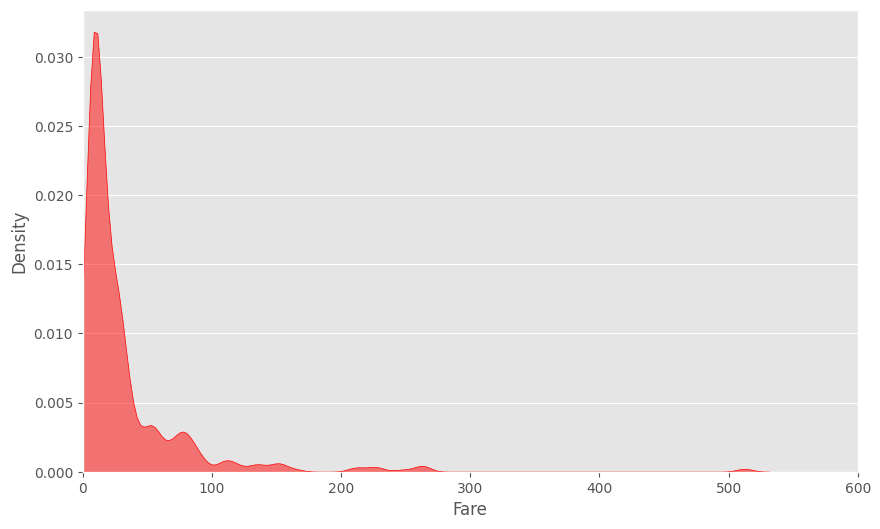

In [18]:
plt.figure(figsize=(10, 6))
sns.kdeplot(titanic['fare'], fill=True, color="red", alpha=0.5, bw_adjust=0.5)
plt.xlim(0,600 )
plt.xlabel('Fare')
plt.ylabel('Density')
plt.grid(axis='x')
plt.show()

A majority of the data range from 0 to 100 but there are a couple of outliers beyond 300 that makes both graphs extremely skewed. The higher the fare the higher the survival rate may be, given the higher class passengers would've been a higher priority.

###Task 3

In [19]:
fare_survived=titanic[titanic['alive']=='yes']['fare']
fare_died=titanic[titanic['alive']=='no']['fare']

In [21]:
fare_survived.head()
fare_died.head()

,fare
0,7.2500
4,8.0500
5,8.4583
6,51.8625
7,21.0750


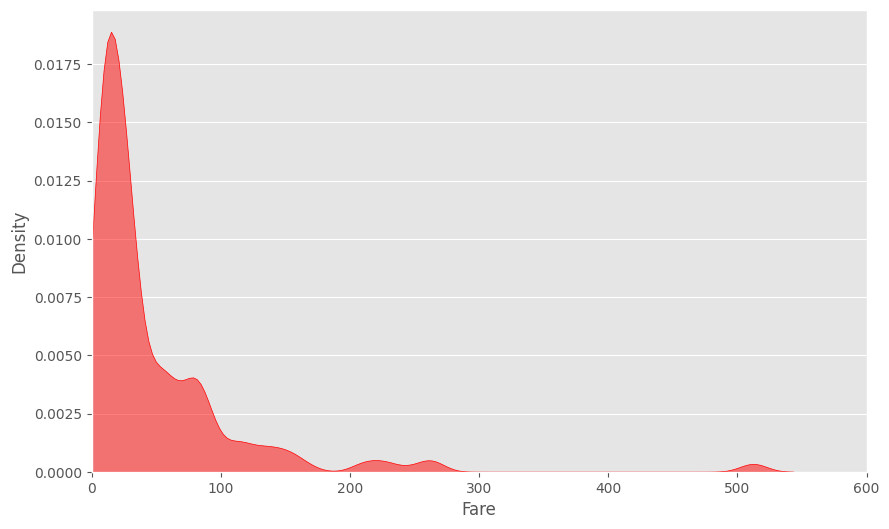

In [23]:
plt.figure(figsize=(10, 6))
sns.kdeplot(fare_survived, fill=True, color="red", alpha=0.5, bw_adjust=0.5, label="Survived")
plt.xlim(0,600 )
plt.xlabel('Fare')
plt.ylabel('Density')
plt.grid(axis='x')
plt.show()

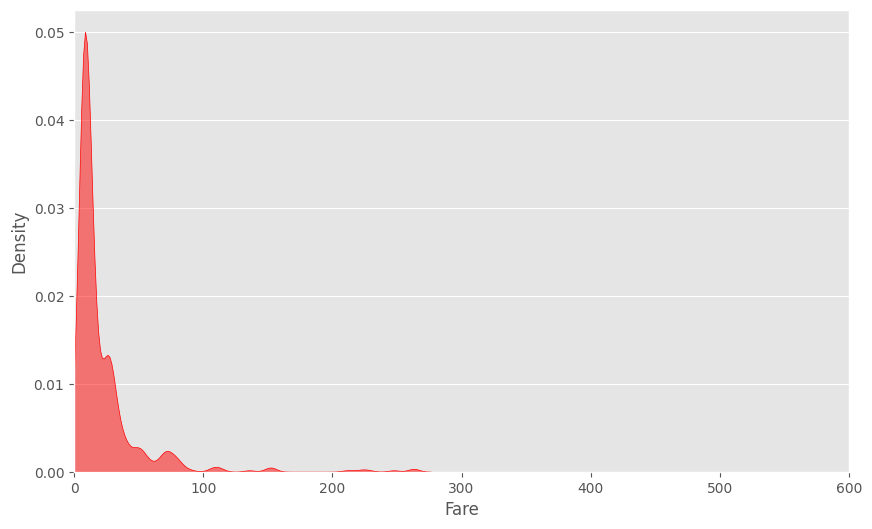

In [24]:
plt.figure(figsize=(10, 6))
sns.kdeplot(fare_died, fill=True, color="red", alpha=0.5, bw_adjust=0.5, label="Died")
plt.xlim(0,600 )
plt.xlabel('Fare')
plt.ylabel('Density')
plt.grid(axis='x')
plt.show()

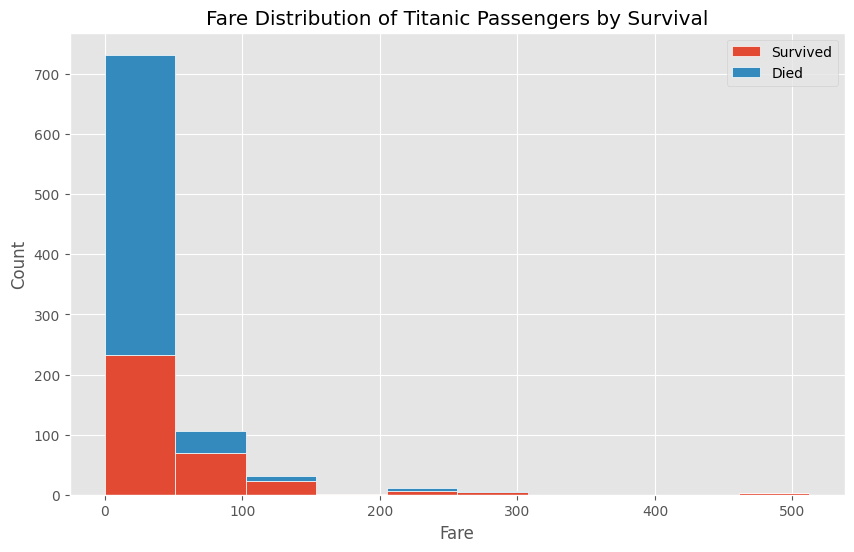

In [29]:
plt.figure(figsize=(10,6))
plt.hist([fare_survived,fare_died], stacked=True, label=['Survived', 'Died'], edgecolor='white')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution of Titanic Passengers by Survival')
plt.legend()
plt.show()

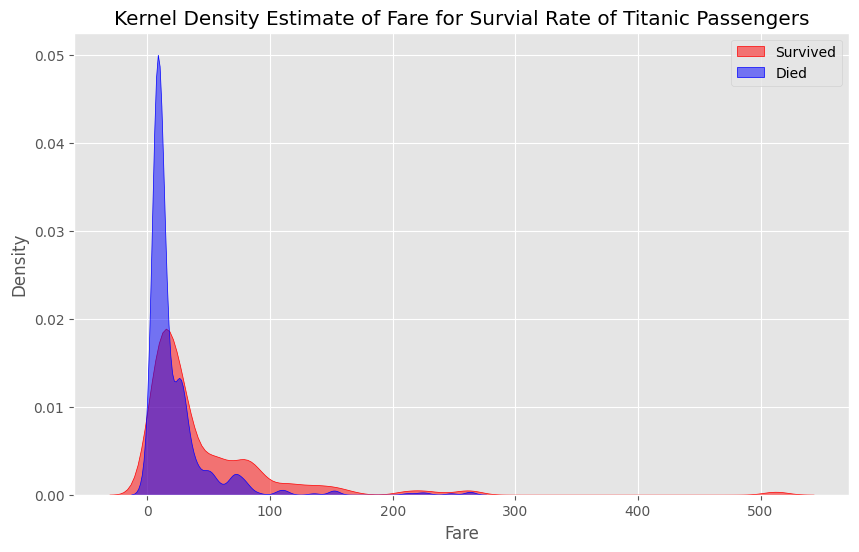

In [33]:
plt.figure(figsize=(10, 6))
sns.kdeplot(fare_survived, fill=True, color="red", alpha=0.5, bw_adjust=0.5, label="Survived")
sns.kdeplot(fare_died, fill=True, color="Blue", alpha=0.5, bw_adjust=0.5, label="Died")
plt.title('Kernel Density Estimate of Fare for Survial Rate of Titanic Passengers')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.show()

The passengers' fares do seem to have a slight impact on survival. It appears that the passengers  with the higher fare have a slightly better change at survival.

#Part 3

###Task 4

In [36]:
first_class=titanic[titanic['pclass']==1]['alive']
second_class=titanic[titanic['pclass']==2]['alive']
third_class=titanic[titanic['pclass']==3]['alive']

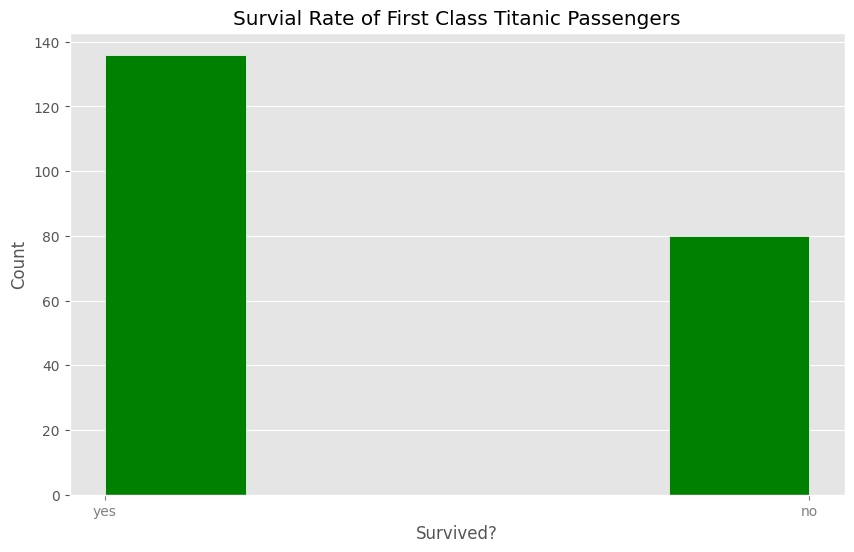

In [38]:
plt.figure(figsize=(10, 6))
plt.hist(first_class, bins=5, color='green',edgecolor='white')
plt.title('Survial Rate of First Class Titanic Passengers')
plt.xlabel('Survived?')
plt.ylabel('Count')
plt.grid(axis='x')
plt.tick_params(axis='x', colors='gray')
plt.show()

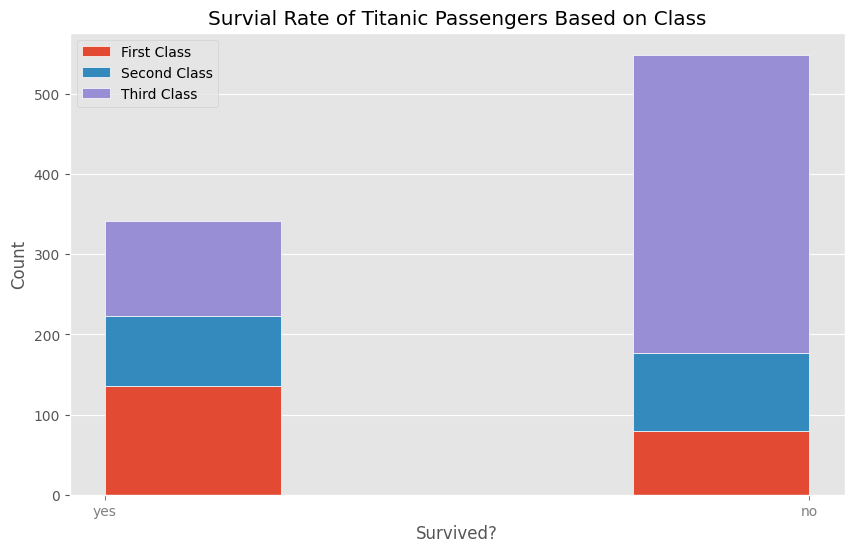

In [95]:
plt.figure(figsize=(10, 6))
plt.hist([first_class,second_class,third_class], stacked=True, label=['First Class', 'Second Class', 'Third Class'], edgecolor='white', bins=4)
plt.title('Survial Rate of Titanic Passengers Based on Class')
plt.xlabel('Survived?')
plt.ylabel('Count')
plt.grid(axis='x')
plt.legend()
plt.tick_params(axis='x', colors='gray')
plt.show()

In [49]:
firstclass_survived=titanic[titanic['alive']=='yes'][titanic['pclass']==1]['fare']
secondclass_survived=titanic[titanic['alive']=='yes'][titanic['pclass']==2]['fare']
thirdclass_survived=titanic[titanic['alive']=='yes'][titanic['pclass']==3]['fare']
firstclass_died=titanic[titanic['alive']=='no'][titanic['pclass']==1]['fare']
secondclass_sdied=titanic[titanic['alive']=='no'][titanic['pclass']==2]['fare']
thirdclass_died=titanic[titanic['alive']=='no'][titanic['pclass']==3]['fare']

<ipython-input-49-9262b064cdf2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  firstclass_survived=titanic[titanic['alive']=='yes'][titanic['pclass']==1]['fare']
<ipython-input-49-9262b064cdf2>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  secondclass_survived=titanic[titanic['alive']=='yes'][titanic['pclass']==2]['fare']
<ipython-input-49-9262b064cdf2>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  thirdclass_survived=titanic[titanic['alive']=='yes'][titanic['pclass']==3]['fare']
<ipython-input-49-9262b064cdf2>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  firstclass_died=titanic[titanic['alive']=='no'][titanic['pclass']==1]['fare']
<ipython-input-49-9262b064cdf2>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  secondclass_sdied=titanic[titanic['alive']=='no'][titanic['pclass']==2]['fare']
<ipython-input-49-9262b064c

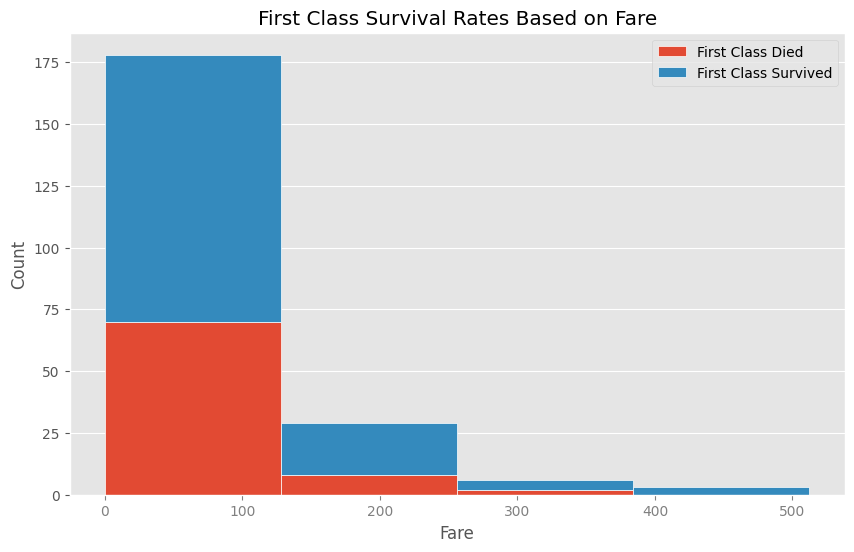

In [54]:
plt.figure(figsize=(10, 6))
plt.hist([firstclass_died,firstclass_survived], stacked=True, label=['First Class Died', 'First Class Survived'], edgecolor='white', bins=4)
plt.title('First Class Survival Rates Based on Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.grid(axis='x')
plt.legend()
plt.tick_params(axis='x', colors='gray')
plt.show()

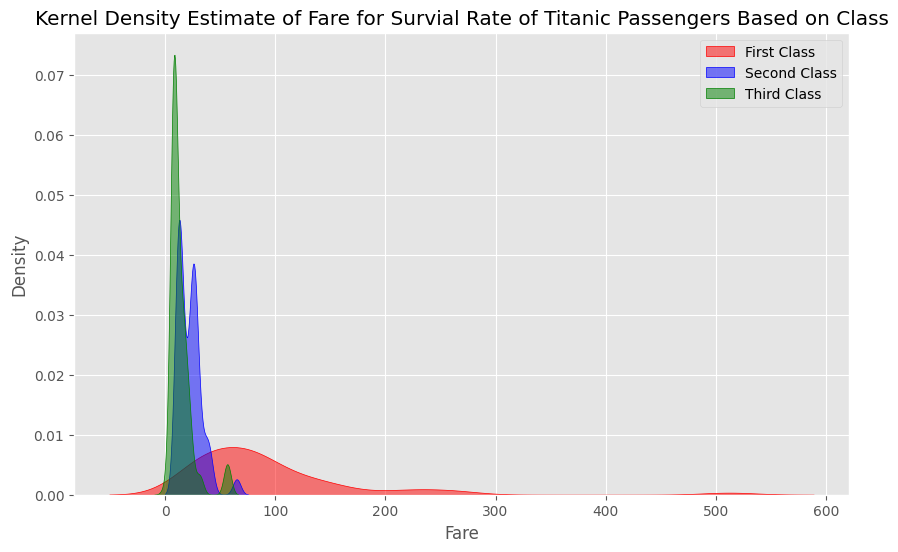

In [56]:
plt.figure(figsize=(10, 6))
sns.kdeplot(firstclass_survived, fill=True, color="red", alpha=0.5, bw_adjust=0.8, label="First Class")
sns.kdeplot(secondclass_survived, fill=True, color="Blue", alpha=0.5, bw_adjust=0.8, label="Second Class")
sns.kdeplot(thirdclass_survived, fill=True, color="green", alpha=0.5, bw_adjust=0.8, label="Third Class")
plt.title('Kernel Density Estimate of Fare for Survial Rate of Titanic Passengers Based on Class')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.show()

It again appears the higher the Fare and Class the more likely the passanger is to survive. This likely means the higher class passengers were escorted of this ship quicker than the lower class passenger and given better acess to the limited number of lifeboats.

#Part 4

###Task 5

In [57]:
age_survived=titanic[titanic['alive']=='yes']['age']
age_died=titanic[titanic['alive']=='no']['age']

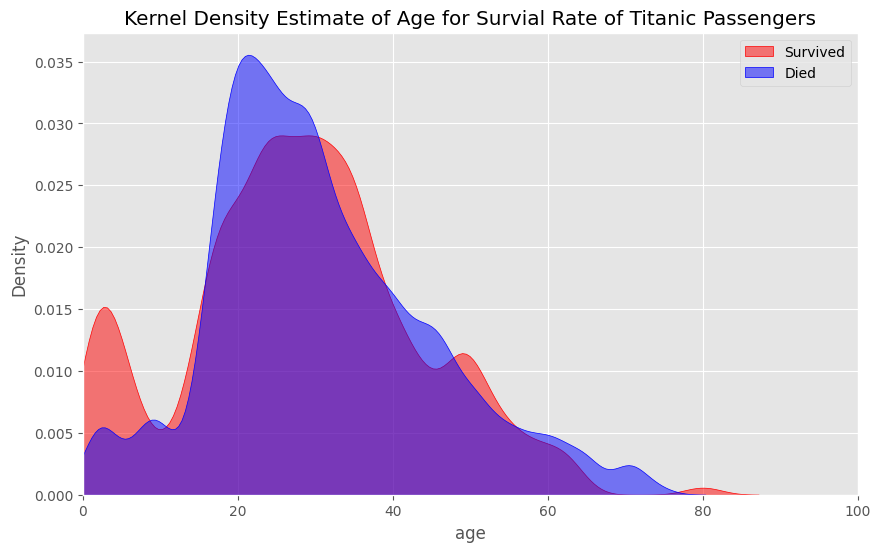

In [61]:
plt.figure(figsize=(10, 6))
sns.kdeplot(age_survived, fill=True, color="red", alpha=0.5, bw_adjust=0.5, label="Survived")
sns.kdeplot(age_died, fill=True, color="Blue", alpha=0.5, bw_adjust=0.5, label="Died")
plt.title('Kernel Density Estimate of Age for Survial Rate of Titanic Passengers')
plt.xlabel('age')
plt.xlim(0,100 )
plt.ylabel('Density')
plt.legend()
plt.show()

It looks like a large proportion of the passengers that did not survived was between the ages of 20 and 40. It also appears very young children had a higher change of survival.

###Task 6

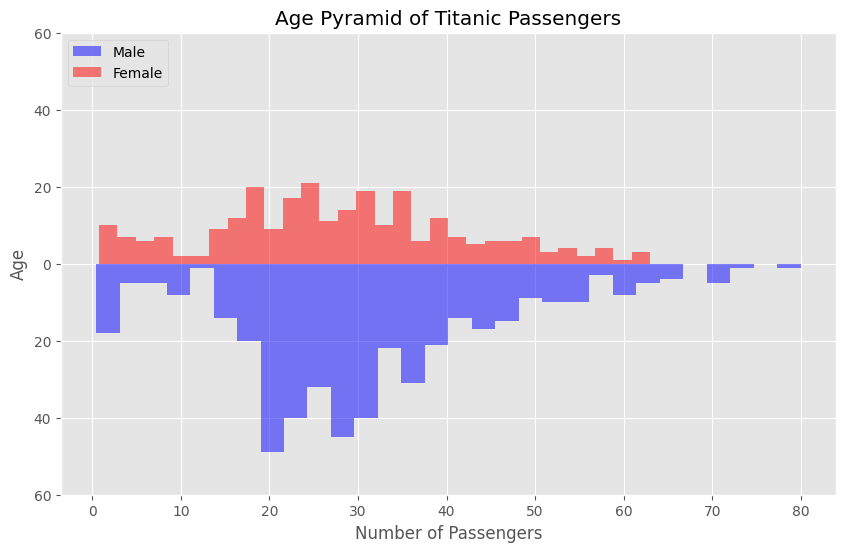

In [64]:
# Filter male and female ages, dropping NaN values
ages_male_survived = titanic[titanic['sex'] == 'male']['age'].dropna()[titanic['alive']='yes']
ages_female = titanic[titanic['sex'] == 'female']['age'].dropna()

# Set up the figure
plt.figure(figsize=(10, 6))

# Plot the male histogram, mirrored to the left (negative weights)
plt.hist(ages_male, bins=30, label='Male', alpha=0.5, color='blue', orientation='vertical', weights=[-1] * len(ages_male))

# Plot the female histogram on the right side (default)
plt.hist(ages_female, bins=30, label='Female', alpha=0.5, color='red', orientation='vertical')

# Add labels and title
plt.xlabel('Number of Passengers')
plt.ylabel('Age')
plt.title('Age Pyramid of Titanic Passengers')

# Customize ticks on the x-axis to show positive values for both sides
plt.yticks([-60, -40, -20, 0, 20, 40, 60], [60, 40, 20, 0, 20, 40, 60])

# Add a legend
plt.legend(loc='upper left')

# Show the plot
plt.show()

In [93]:
ages_male_survived = titanic[titanic['sex'] == 'male']['age'].dropna()[titanic['alive']=='yes']
ages_male_died = titanic[titanic['sex'] == 'male']['age'].dropna()[titanic['alive']=='no']
ages_female_survived = titanic[titanic['sex'] == 'female']['age'].dropna()[titanic['alive']=='yes']
ages_female_died = titanic[titanic['sex'] == 'female']['age'].dropna()[titanic['alive']=='no']
ages_male = titanic[titanic['sex'] == 'male']['age'].dropna()

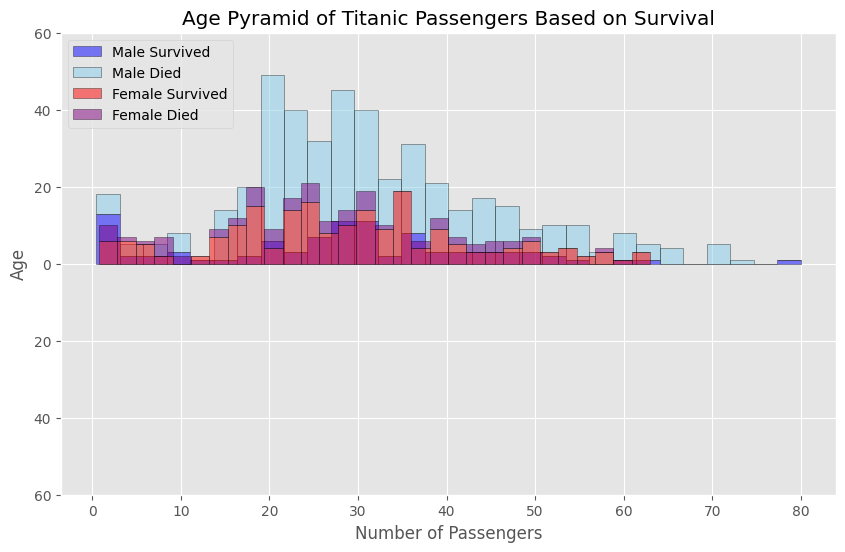

In [91]:
plt.figure(figsize=(10, 6))
plt.hist([ages_male_survived, ages_male_died], bins=30, label=['Male Survived', 'Male Died'], alpha=0.5, color=['blue', 'skyblue'], orientation='vertical', stacked=True, edgecolor='black')
plt.hist([ages_female_survived, ages_female_died], bins=30, label=['Female Survived', 'Female Died'], alpha=0.5, color=['red', 'purple'], orientation='vertical', stacked=True, edgecolor='black')

plt.xlabel('Number of Passengers')
plt.ylabel('Age')
plt.title('Age Pyramid of Titanic Passengers Based on Survival')
plt.yticks([-60, -40, -20, 0, 20, 40, 60], [60, 40, 20, 0, 20, 40, 60])
plt.legend(loc='upper left')
plt.show()

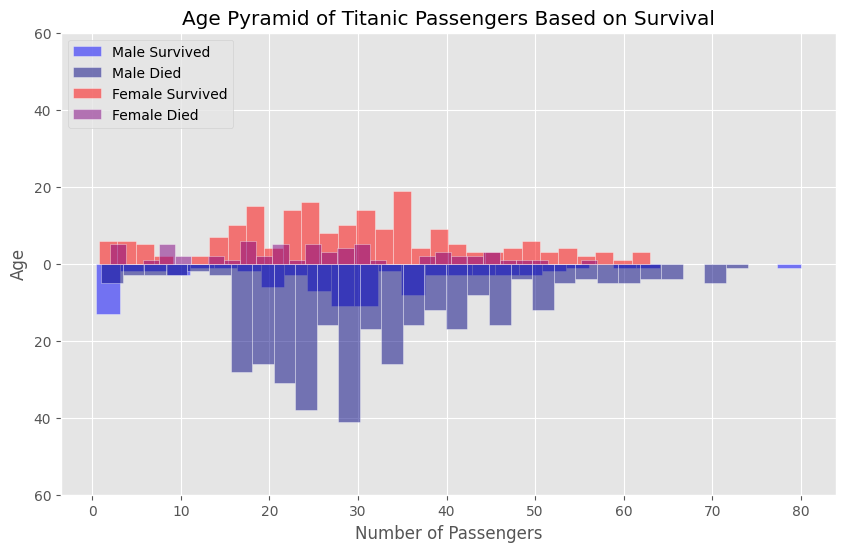

In [94]:
plt.figure(figsize=(10, 6))
plt.hist(ages_male_survived, bins=30, label='Male Survived', alpha=0.5, color='blue', orientation='vertical', weights=[-1] * len(ages_male_survived), stacked=True, edgecolor='white')
plt.hist(ages_male_died, bins=30, label='Male Died', alpha=0.5, color='navy', orientation='vertical', weights=[-1] * len(ages_male_died), stacked=True, edgecolor='white')
plt.hist(ages_female_survived, bins=30, label='Female Survived', alpha=0.5, color='red', orientation='vertical', stacked=True, edgecolor='white')
plt.hist(ages_female_died, bins=30, label='Female Died', alpha=0.5, color='purple', orientation='vertical', stacked=True, edgecolor='white')

#I couldn't figure out a way to get the graph to be stacked and be on both the positive and negative side of the graph

plt.xlabel('Number of Passengers')
plt.ylabel('Age')
plt.title('Age Pyramid of Titanic Passengers Based on Survival')
plt.yticks([-60, -40, -20, 0, 20, 40, 60], [60, 40, 20, 0, 20, 40, 60])
plt.legend(loc='upper left')
plt.show()

It appears that the proportion of very young males had a higher survival rate than any other age compared to the rest of the males. There is also a considerably higher amount of females that survied than males. It seems the main objective when getting people of the ship was prioritzing women and children.